
Imported Dependencies for Analysis


In [45]:
#imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import plotly.express as px
from sklearn.decomposition import PCA
import numpy as np


from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/amazon_cleaned.csv')

#df = pd.read_csv('/content/amazon_cleaned.csv')

#this column just appeared after data was exported to csv, after cleaning
#drop "unnamed:0" column
df.drop("Unnamed: 0", axis = 1, inplace = True)

df.head()

,year,state,month,number_of_registered_fires,date
0,1998,Acre,January,0,1998-01-01
1,1999,Acre,January,0,1999-01-01
2,2000,Acre,January,0,2000-01-01
3,2001,Acre,January,0,2001-01-01
4,2002,Acre,January,0,2002-01-01


12. Total number of fires registered.

In [ ]:
#used sum method to find total number of fires recorded in dataset.
print("Total number of registered fires in brazil: ", df['number_of_registered_fires'].sum())

Total number of registered fires in brazil:  698438


13. In which month maximum number of forest fires were reported?

In [ ]:
print("Beginning Year: ", df['year'].min())

Beginning Year:  1998


In [ ]:
print("Beginning Year: ", df['year'].max())

Beginning Year:  2017


In [ ]:
df.sort_values('number_of_registered_fires', ascending=False).head(5)

,year,state,month,number_of_registered_fires,date
887,2008,Amazonas,September,998,2008-01-01
1104,2006,Bahia,August,995,2006-01-01
1409,2012,Ceara,November,995,2012-01-01
6314,2009,Tocantins,July,989,2009-01-01
3733,2017,Paraiba,August,987,2017-01-01


In [ ]:
#grouped months, used max method 
maximun_num_forrest_fires = df.groupby('month').max().reset_index()
month_fires_graph_df = maximun_num_forrest_fires[['month', 'number_of_registered_fires']].sort_values(by='number_of_registered_fires', ascending=False).reset_index()
month_fires_graph_df

,index,month,number_of_registered_fires
0,11,September,998
1,1,August,995
2,9,November,995
3,5,July,989
4,6,June,979
5,10,October,964
6,4,January,960
7,2,December,956
8,0,April,947
9,8,May,942


[Text(0.5, 1.0, 'month maximum number of forest fires were reported')]

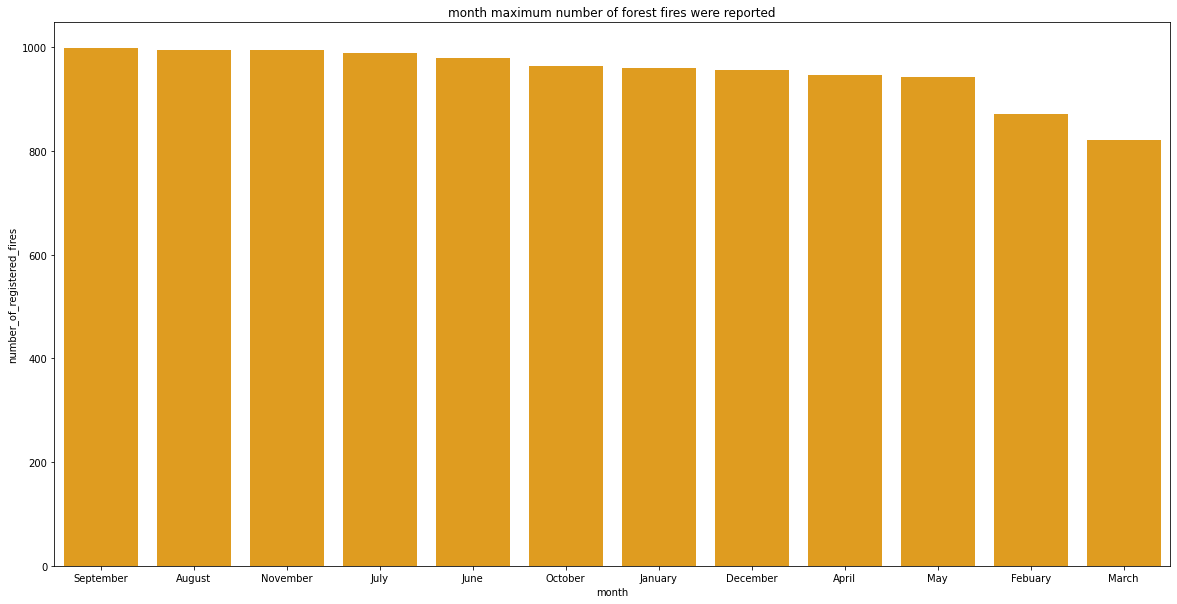

In [ ]:
#create barplot for dataframe
x = month_fires_graph_df['month']
y = month_fires_graph_df['number_of_registered_fires']
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = month_fires_graph_df, color='orange').set(title="month maximum number of forest fires were reported")

2008	Amazonas	September	998	2008-01-01, was the row with highest count for any month in a year. Second was august, then november in third place.

14. In which year maximum number of forest fires was reported?

In [ ]:
#grouped year column, used max method 
maximun_num_forrest_fires_by_year = df.groupby('year').max().reset_index()
year_fires_graph_df = maximun_num_forrest_fires_by_year[['year', 'state','number_of_registered_fires']].sort_values(by='number_of_registered_fires',ascending=False).reset_index()
year_fires_graph_df

,index,year,state,number_of_registered_fires
0,10,2008,Tocantins,998
1,8,2006,Tocantins,995
2,14,2012,Tocantins,995
3,11,2009,Tocantins,989
4,19,2017,Tocantins,987
5,9,2007,Tocantins,982
6,1,1999,Tocantins,982
7,3,2001,Tocantins,979
8,5,2003,Tocantins,977
9,4,2002,Tocantins,976


[Text(0.5, 1.0, 'year maximum number of forest fires were reported')]

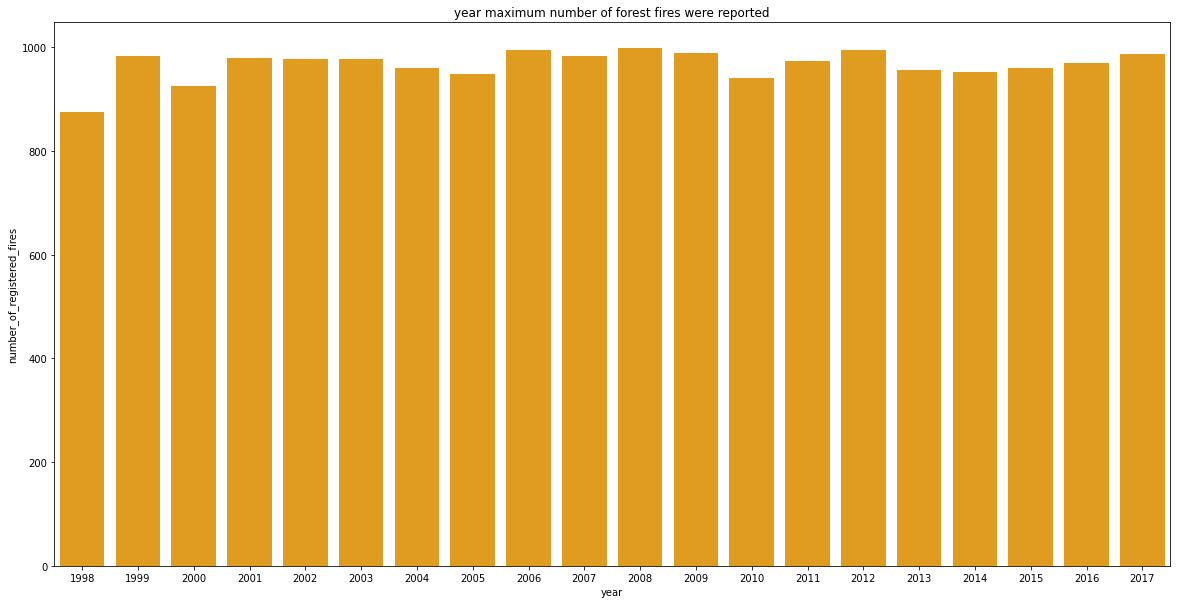

In [ ]:
#create barplot for dataframe
x = year_fires_graph_df['year']
y = year_fires_graph_df['number_of_registered_fires']
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = year_fires_graph_df, color='orange').set(title="year maximum number of forest fires were reported")

First to third place: 2008 with	998, 2006 with	995, 2012 with	995. Its a tie between 2006 and 2012. So third place goes to 2009 with	989.

15. In which state maximum number of forest fires was reported?

In [ ]:
#grouped state column, used max method 
maximun_num_forrest_fires_by_state = df.groupby('state').max().reset_index()
state_fires_graph_df = maximun_num_forrest_fires_by_year[['state', 'year','number_of_registered_fires']].sort_values(by='number_of_registered_fires',ascending=False).reset_index()
state_fires_graph_df

,index,state,year,number_of_registered_fires
0,10,Tocantins,2008,998
1,8,Tocantins,2006,995
2,14,Tocantins,2012,995
3,11,Tocantins,2009,989
4,19,Tocantins,2017,987
5,9,Tocantins,2007,982
6,1,Tocantins,1999,982
7,3,Tocantins,2001,979
8,5,Tocantins,2003,977
9,4,Tocantins,2002,976


The highest number of forest fires reported was Tocantins. 

[Text(0.5, 1.0, 'state maximum number of forest fires were reported in Tocantins')]

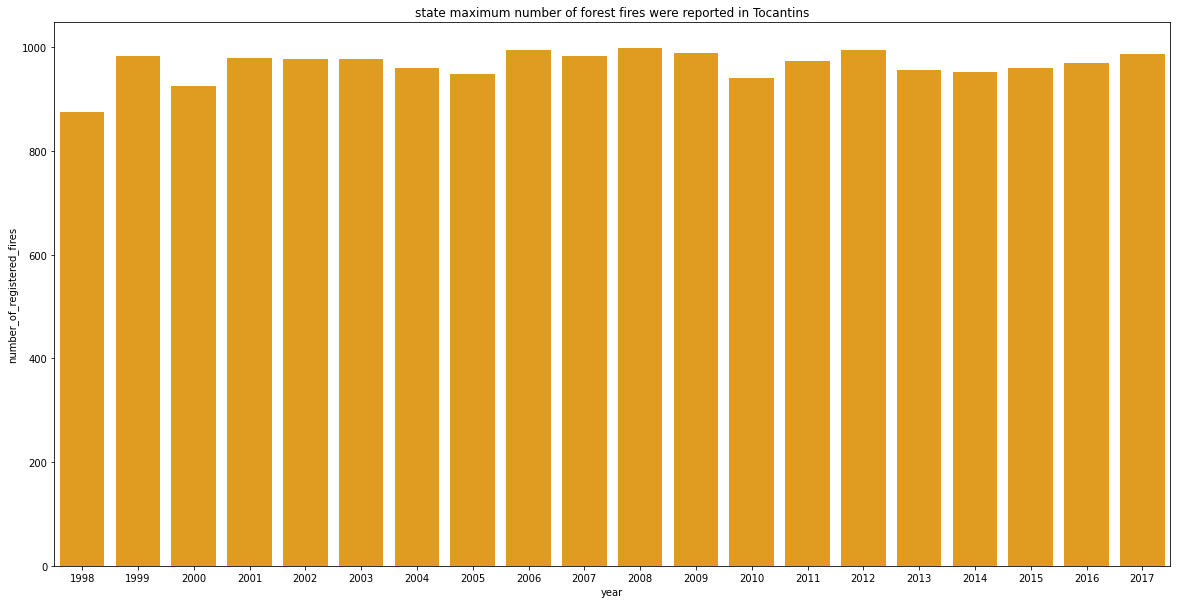

In [ ]:
#create barplot for dataframe
x = state_fires_graph_df['year']
y = state_fires_graph_df['number_of_registered_fires']
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = state_fires_graph_df, color='orange').set(title="state maximum number of forest fires were reported in Tocantins")

16. Find total number of fires were reported in amazonas (state of brazil)

In [ ]:
print("total number of fires were reported in amazonas (state of brazil): ", df.loc[df['state'] == 'Amazonas'].sum()['number_of_registered_fires'])

total number of fires were reported in amazonas (state of brazil):  30636


Amazonas has around 9th place in terms of total number of fires. The largest goes to Mato Grosso.

In [ ]:
g1 = df.groupby('state').sum()
g2 = g1.sort_values(by='number_of_registered_fires',ascending=False).reset_index()
g2

,state,year,number_of_registered_fires
0,Mato Grosso,949576,96178
1,Paraiba,947563,52423
2,Sao Paulo,479783,51118
3,Rio,1399308,45094
4,Bahia,479783,44718
5,Piau,479783,37777
6,Goias,479783,37677
7,Minas Gerais,479783,37453
8,Tocantins,479783,33675
9,Amazonas,479783,30636


17. Display number of fires were reported in amazon (year-wise)

In [ ]:
# used loc method with conditon to filter all row with specified state, then grouped by year
group1 = df.loc[df['state'] == 'Amazonas']
group2 = group1.groupby('year').sum().reset_index() # year-wise
group2

,year,number_of_registered_fires
0,1998,946
1,1999,1061
2,2000,853
3,2001,1297
4,2002,2852
5,2003,1523
6,2004,2298
7,2005,1656
8,2006,997
9,2007,589


[Text(0.5, 1.0, 'number of fires were reported in amazon(state-amazonas) year-wise')]

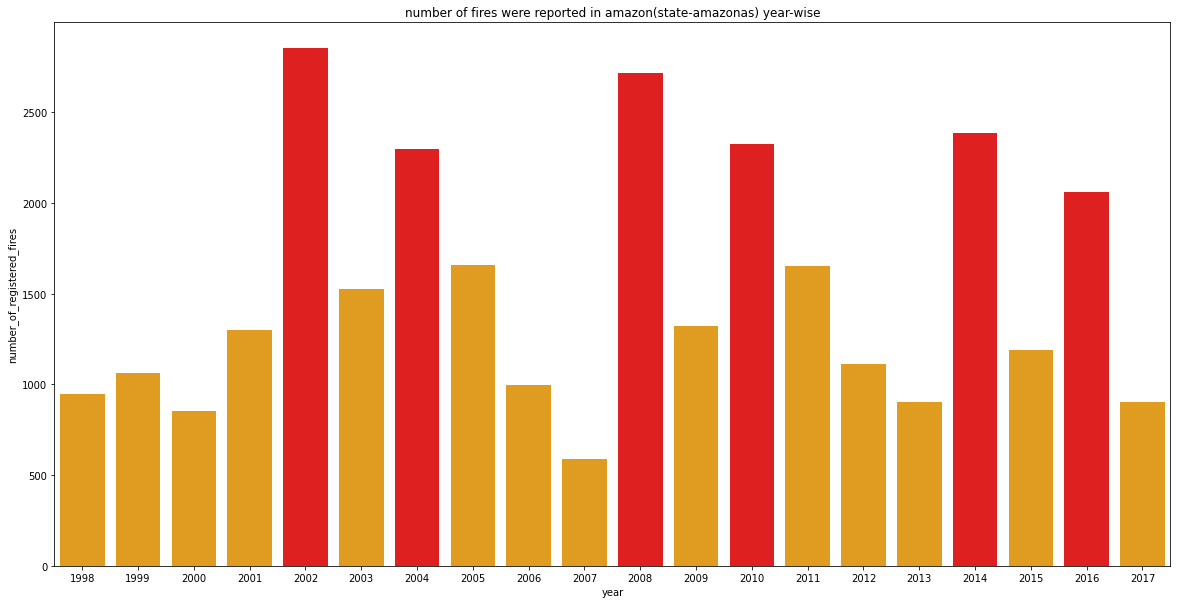

In [ ]:
#create barplot for dataframe
x = group2['year']
y = group2['number_of_registered_fires']
clrs = ['red' if (y >= 2000) else 'orange' for y in y]
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = group2, palette=clrs).set(title="number of fires were reported in amazon(state-amazonas) year-wise")

Bar colored red have a record number of fires over 2000 in amazonas.

18. Display number of fires were reported in amazon (day-wise)


In [ ]:
# used loc method with conditon to filter all row with specified state, then grouped by date
group3 = df.loc[df['state'] == 'Amazonas']
group4 = group3.groupby('date').sum().reset_index() 
group4

,date,year,number_of_registered_fires
0,1998-01-01,23976,946
1,1999-01-01,23988,1061
2,2000-01-01,24000,853
3,2001-01-01,24012,1297
4,2002-01-01,24024,2852
5,2003-01-01,24036,1523
6,2004-01-01,24048,2298
7,2005-01-01,24060,1656
8,2006-01-01,24072,997
9,2007-01-01,24084,589


[Text(0.5, 1.0, 'number of fires were reported in amazon (day-wise)')]

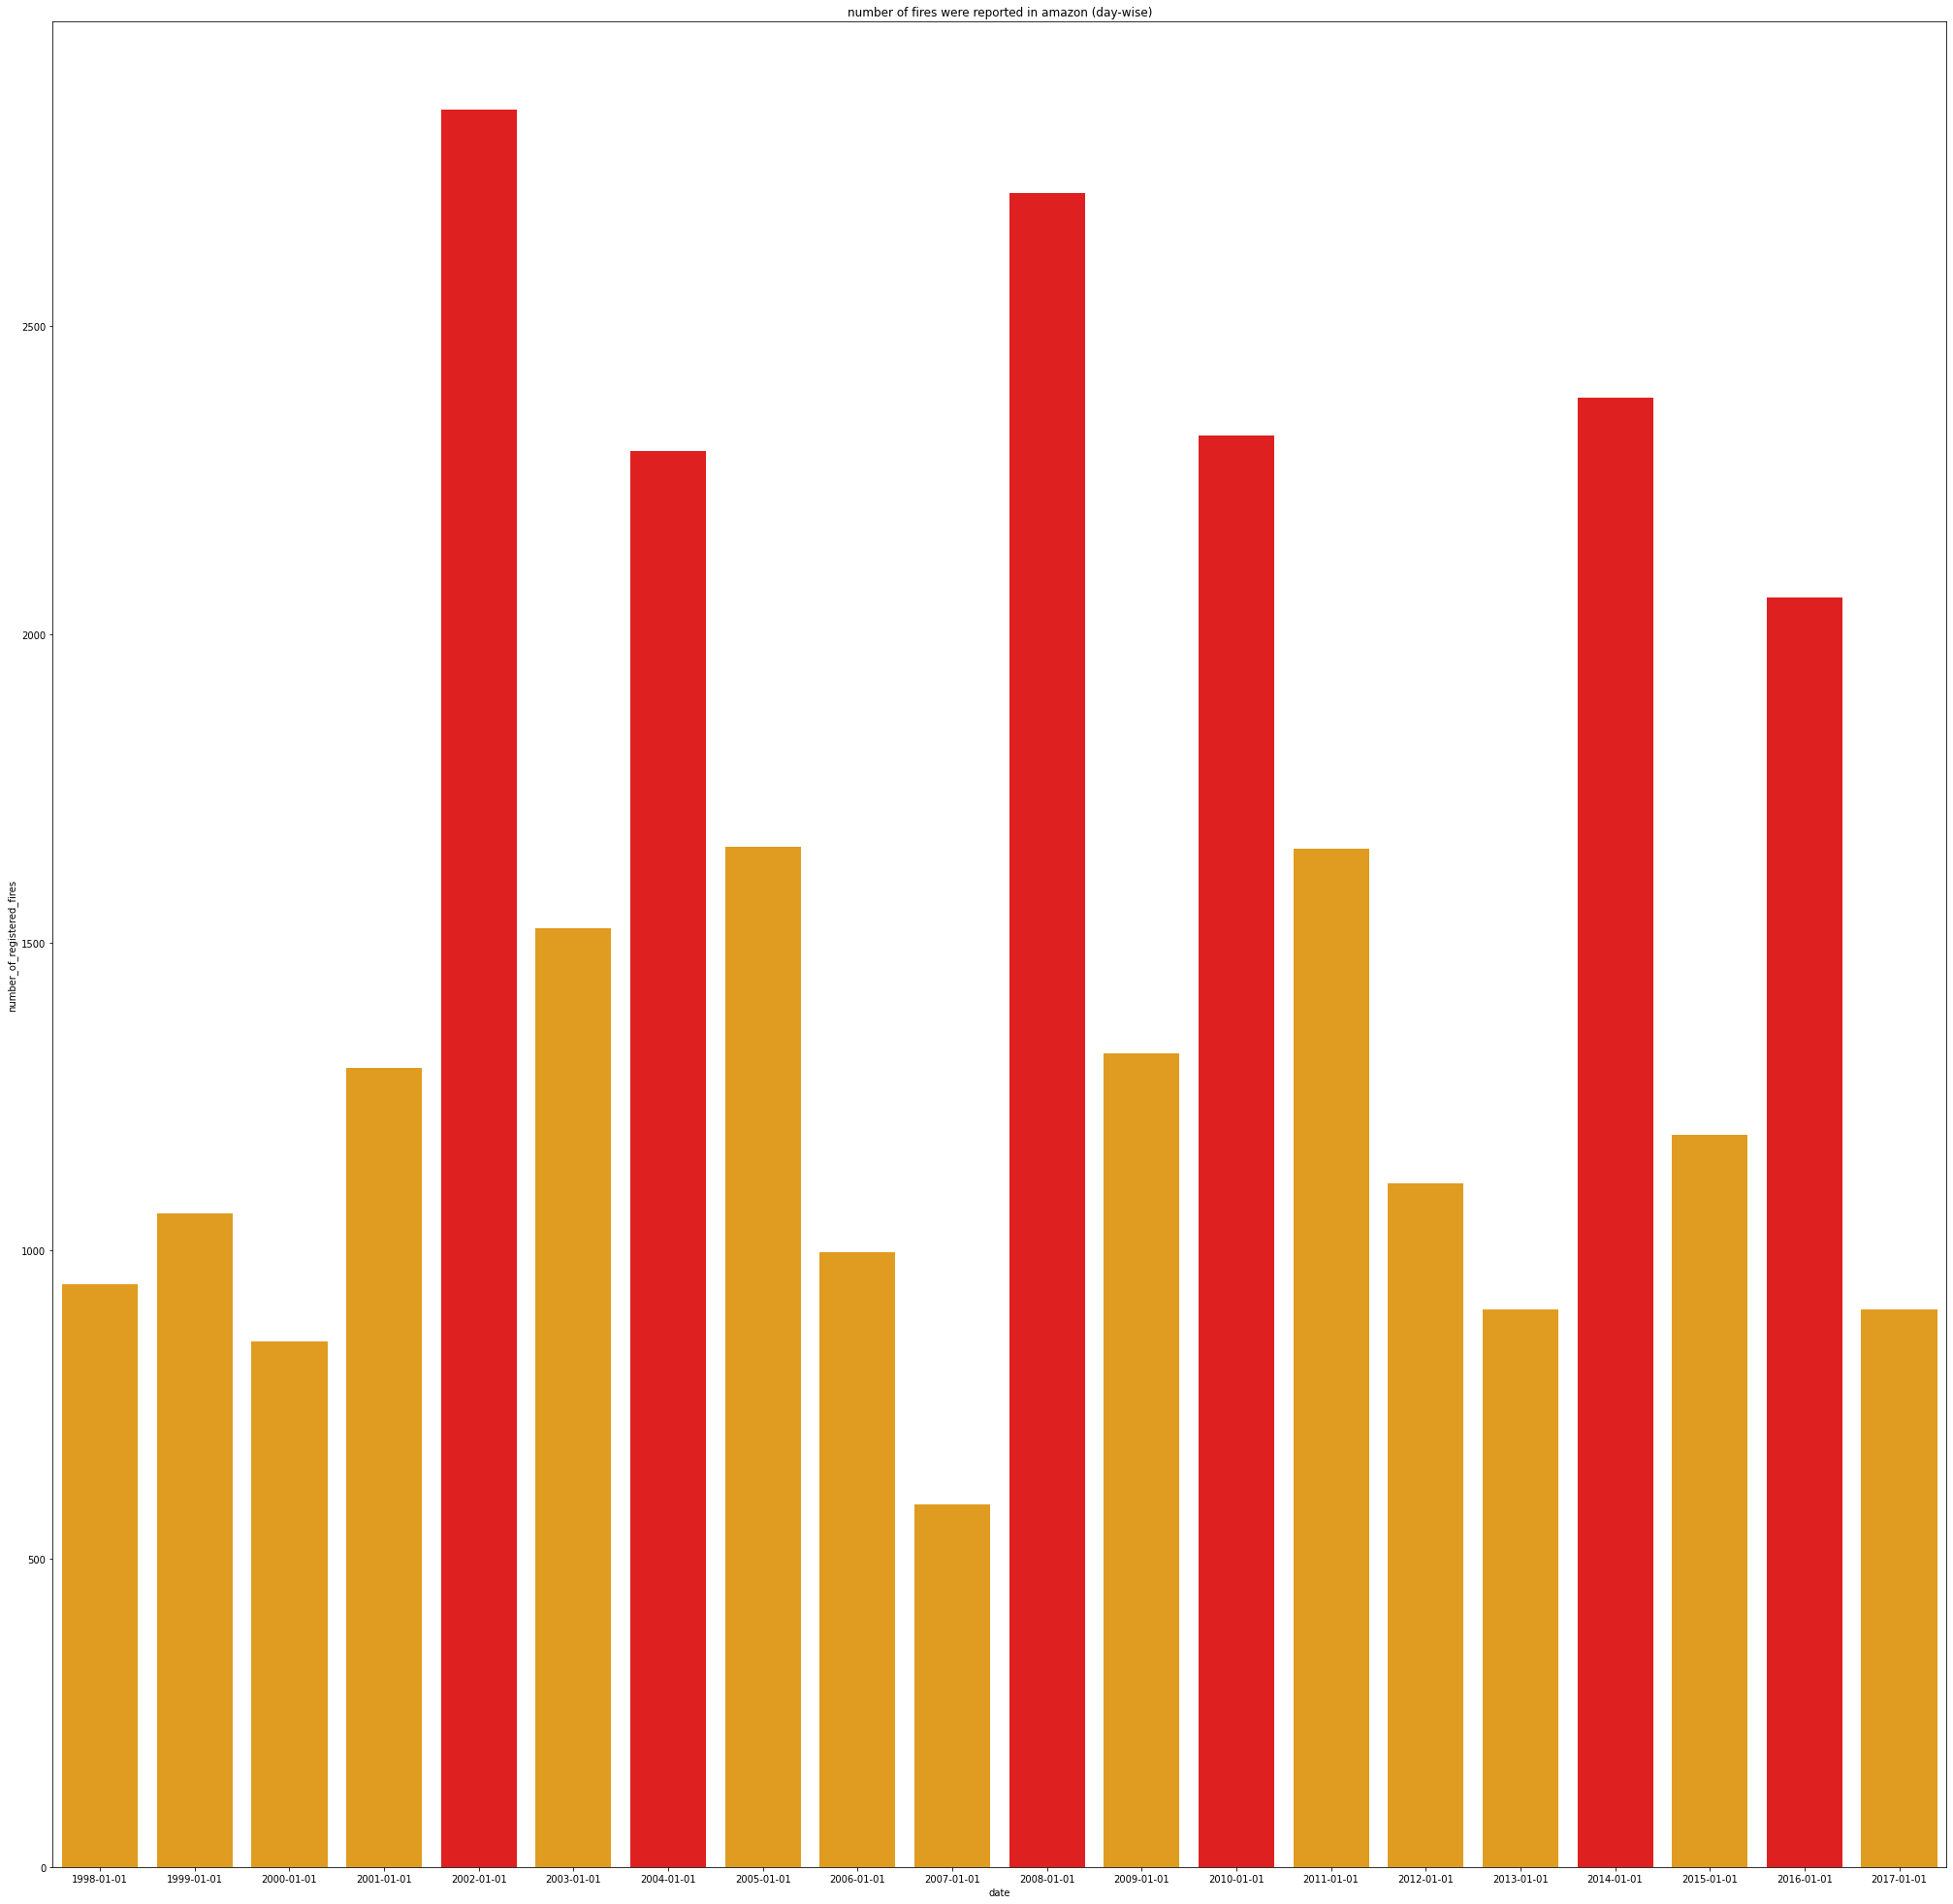

In [ ]:
#create barplot for dataframe
x = group4['date']
y = group4['number_of_registered_fires']
clrs = ['red' if (y >= 2000) else 'orange' for y in y]
plt.figure(figsize=(35,35))
sns.barplot(x = x, y = y, data = group4, palette=clrs).set(title="number of fires were reported in amazon (day-wise)")

Bars in red denotes total amount of fires as over 2000 for a day. Orange is below 2000 for a day.

19. Find total number of fires were reported in 2015 and visualize data based on each ‘month’

In [ ]:
# used loc method with conditon to filter all row with specified state, then grouped by year
group5 = df.loc[df['date'] == '2015-01-01'] #gathered all rows for year 2015
group6 = group5.groupby('month').sum().reset_index() 
group7 = group6[['month' ,'year','number_of_registered_fires']].sort_values(by='number_of_registered_fires',ascending=False).reset_index()
group7

,index,month,year,number_of_registered_fires
0,4,January,54405,4635
1,10,October,54405,4493
2,5,July,54405,4363
3,1,August,54405,4359
4,2,December,54405,4086
5,9,November,54405,4031
6,6,June,54405,3260
7,0,April,54405,2573
8,11,September,54405,2489
9,8,May,54405,2384


[Text(0.5, 1.0, 'total number of fires were reported in 2015 by month')]

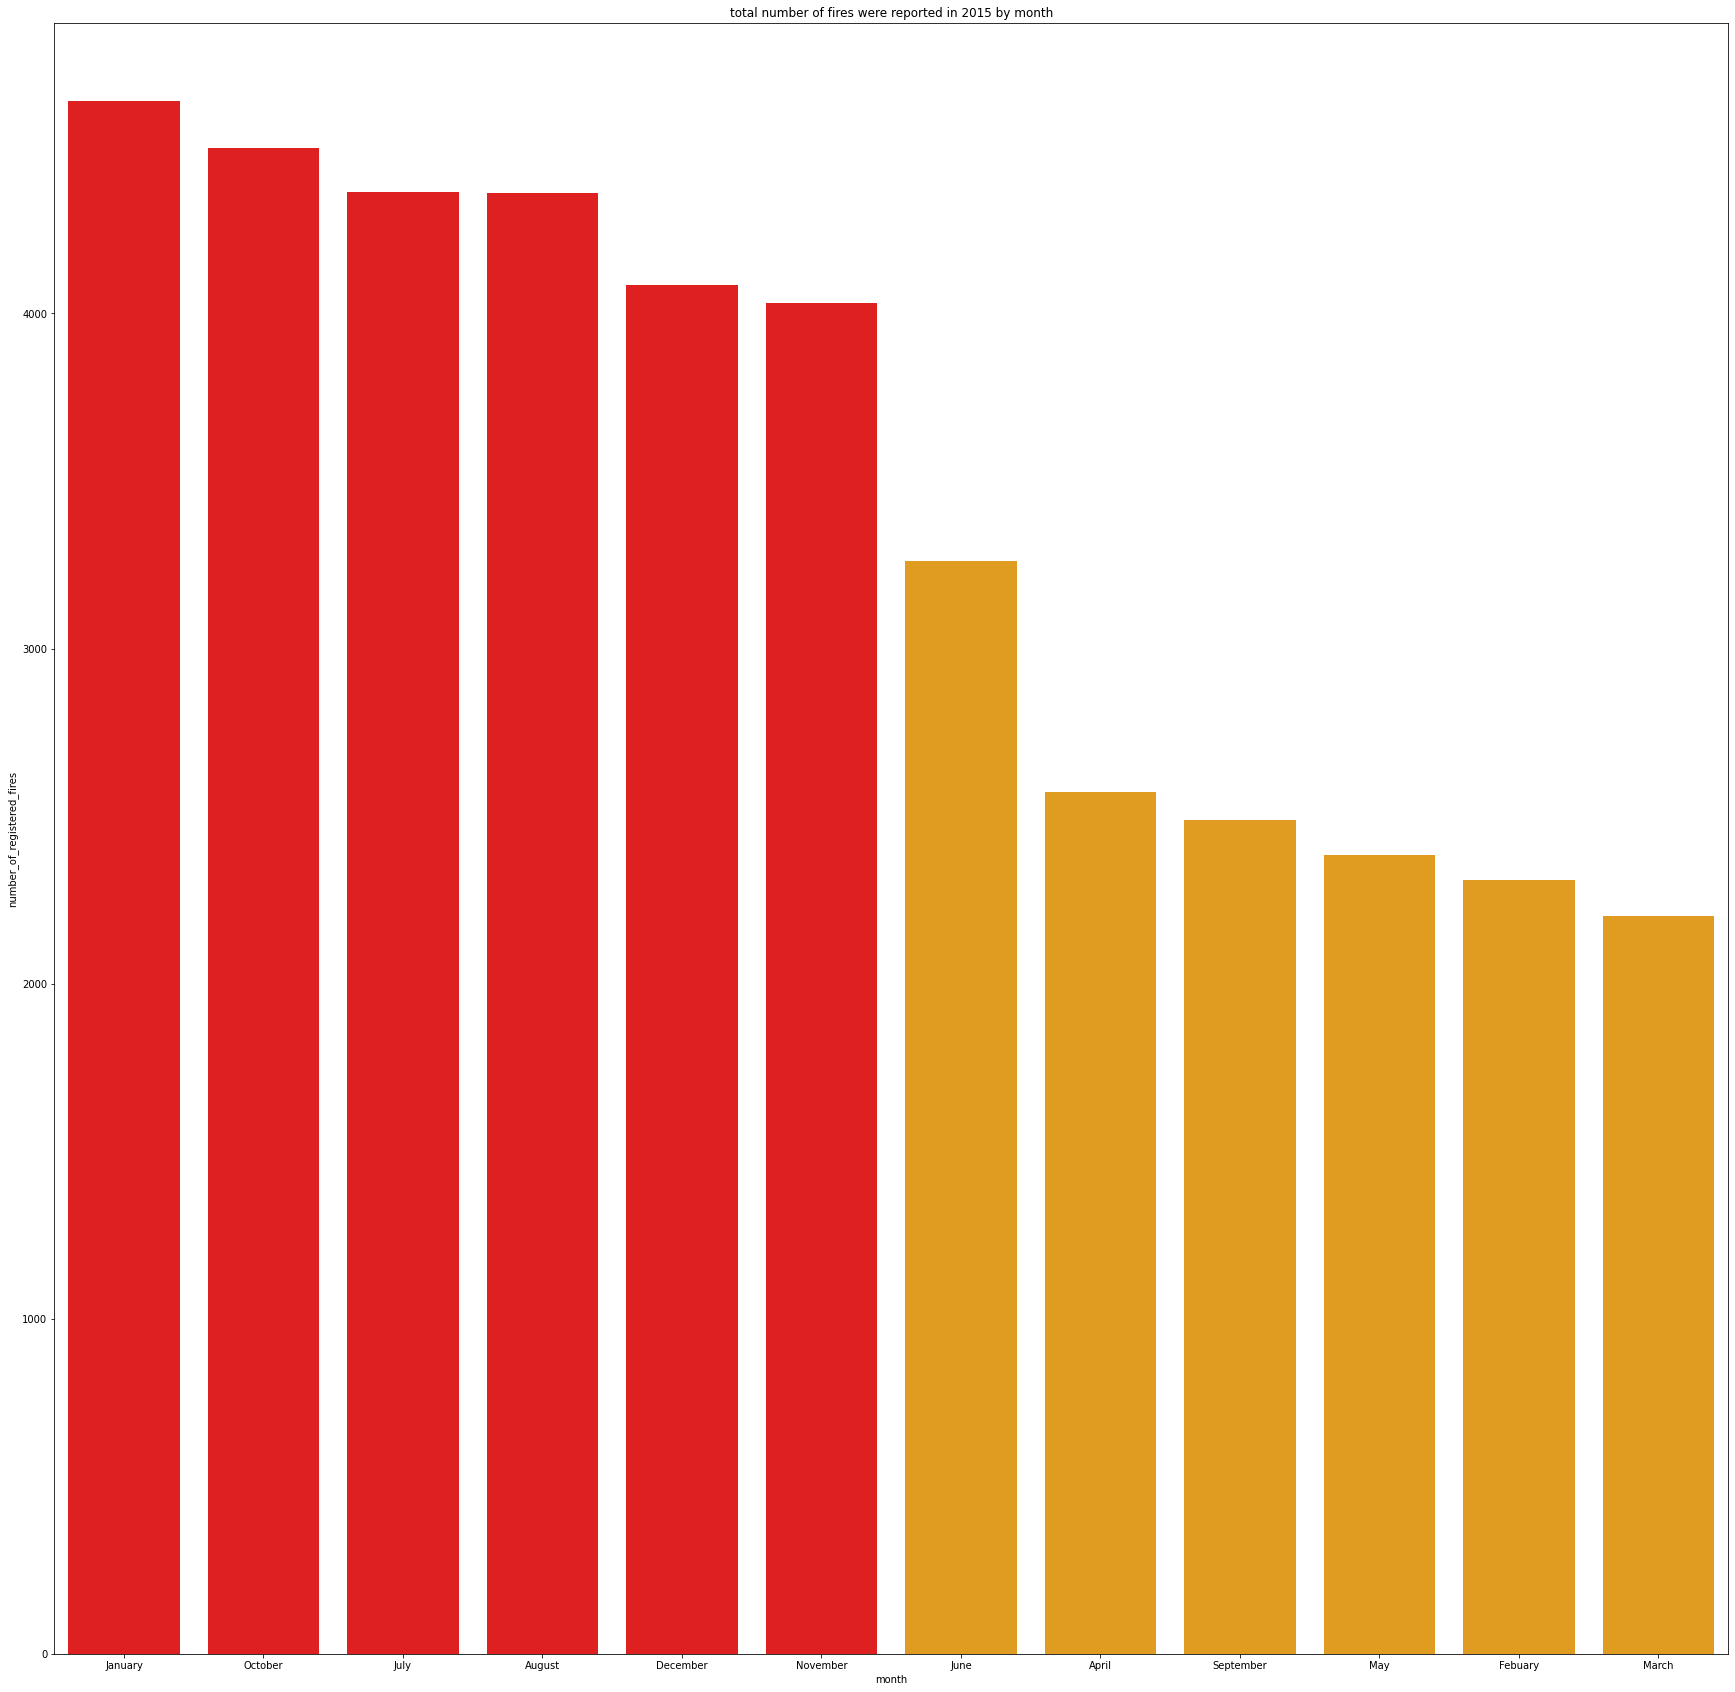

In [ ]:
#create barplot for dataframe
x = group7['month']
y = group7['number_of_registered_fires']
clrs = ['red' if (y >= 4000) else 'orange' for y in y]
plt.figure(figsize=(30,30))
sns.barplot(x = x, y = y, data = group7, palette=clrs).set(title="total number of fires were reported in 2015 by month")

Anything in red has over 4,000 fires for that month alone. Anything in orange has under 4,000 fires for that month alone.

20. Find average number of fires were reported from highest to lowest (state-wise).

In [ ]:
g3 = df.groupby('state').mean()
g4 = g3.sort_values(by='number_of_registered_fires',ascending=False).reset_index()
g5 = g4[['state', 'number_of_registered_fires']].reset_index()
g5.rename(index=str, columns={"number_of_registered_fires": "avg_number_of_fires"}, inplace = True)
g5

,index,state,avg_number_of_fires
0,0,Sao Paulo,213.882845
1,1,Mato Grosso,203.336152
2,2,Bahia,187.104603
3,3,Piau,158.062762
4,4,Goias,157.644351
5,5,Minas Gerais,156.707113
6,6,Tocantins,140.899582
7,7,Amazonas,128.184100
8,8,Ceara,127.259414
9,9,Paraiba,111.065678


[Text(0.5, 1.0, 'average number of fires were reported from highest to lowest, state-wise')]

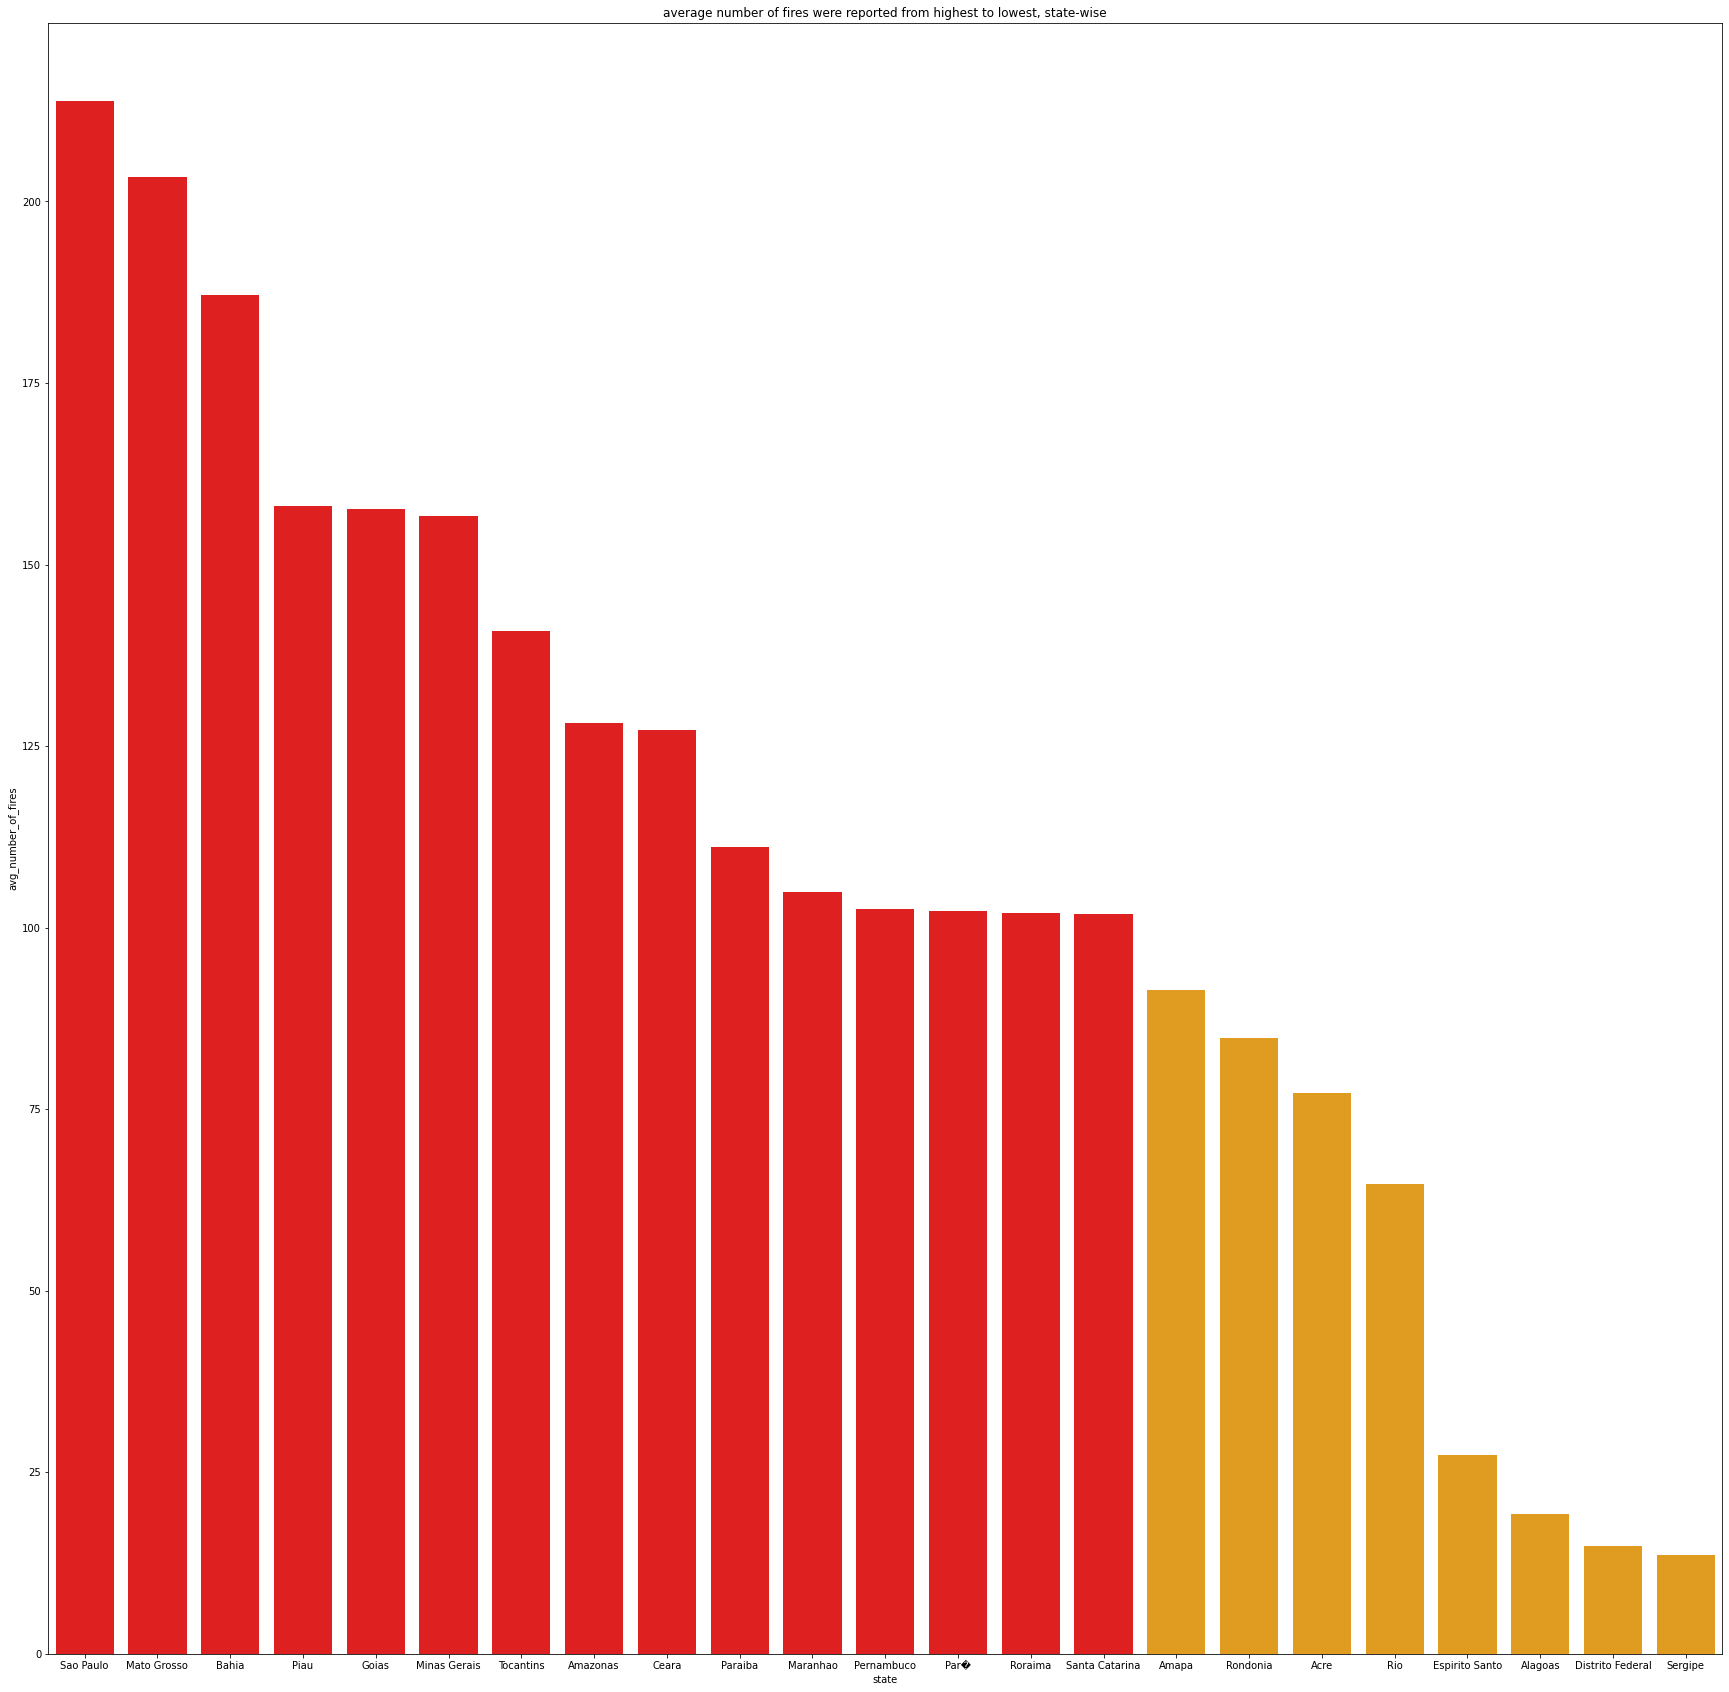

In [ ]:
#create barplot for dataframe
x = g5['state']
y = g5['avg_number_of_fires']
clrs = ['red' if (y >= 101.920502) else 'orange' for y in y]
plt.figure(figsize=(30,30))
sns.barplot(x = x, y = y, data = g5, palette=clrs).set(title="average number of fires were reported from highest to lowest, state-wise")

Bars in red denoate average number of fires over 100 and orange denotes average below 100.

21. To find the state names where fires were reported in 'dec' month.


In [ ]:
g10 = df.loc[df['month'] == 'December']
g11 = g10.groupby(['state', 'month']).sum().reset_index()
g12 = g11[['month', 'state','number_of_registered_fires']].sort_values(by='number_of_registered_fires',ascending=False).reset_index()
g12

,index,month,state,number_of_registered_fires
0,10,December,Mato Grosso,7593
1,15,December,Piau,7030
2,5,December,Ceara,5247
3,4,December,Bahia,4559
4,2,December,Amapa,4504
5,12,December,Paraiba,4222
6,16,December,Rio,3713
7,14,December,Pernambuco,3340
8,18,December,Roraima,2377
9,3,December,Amazonas,2224


In [ ]:
print("Total number of states that reported fires during the month of december: ",len(g12))

Total number of states that reported fires during the month of december:  23


[Text(0.5, 1.0, 'States that reported fires in December, with number of recorded fires')]

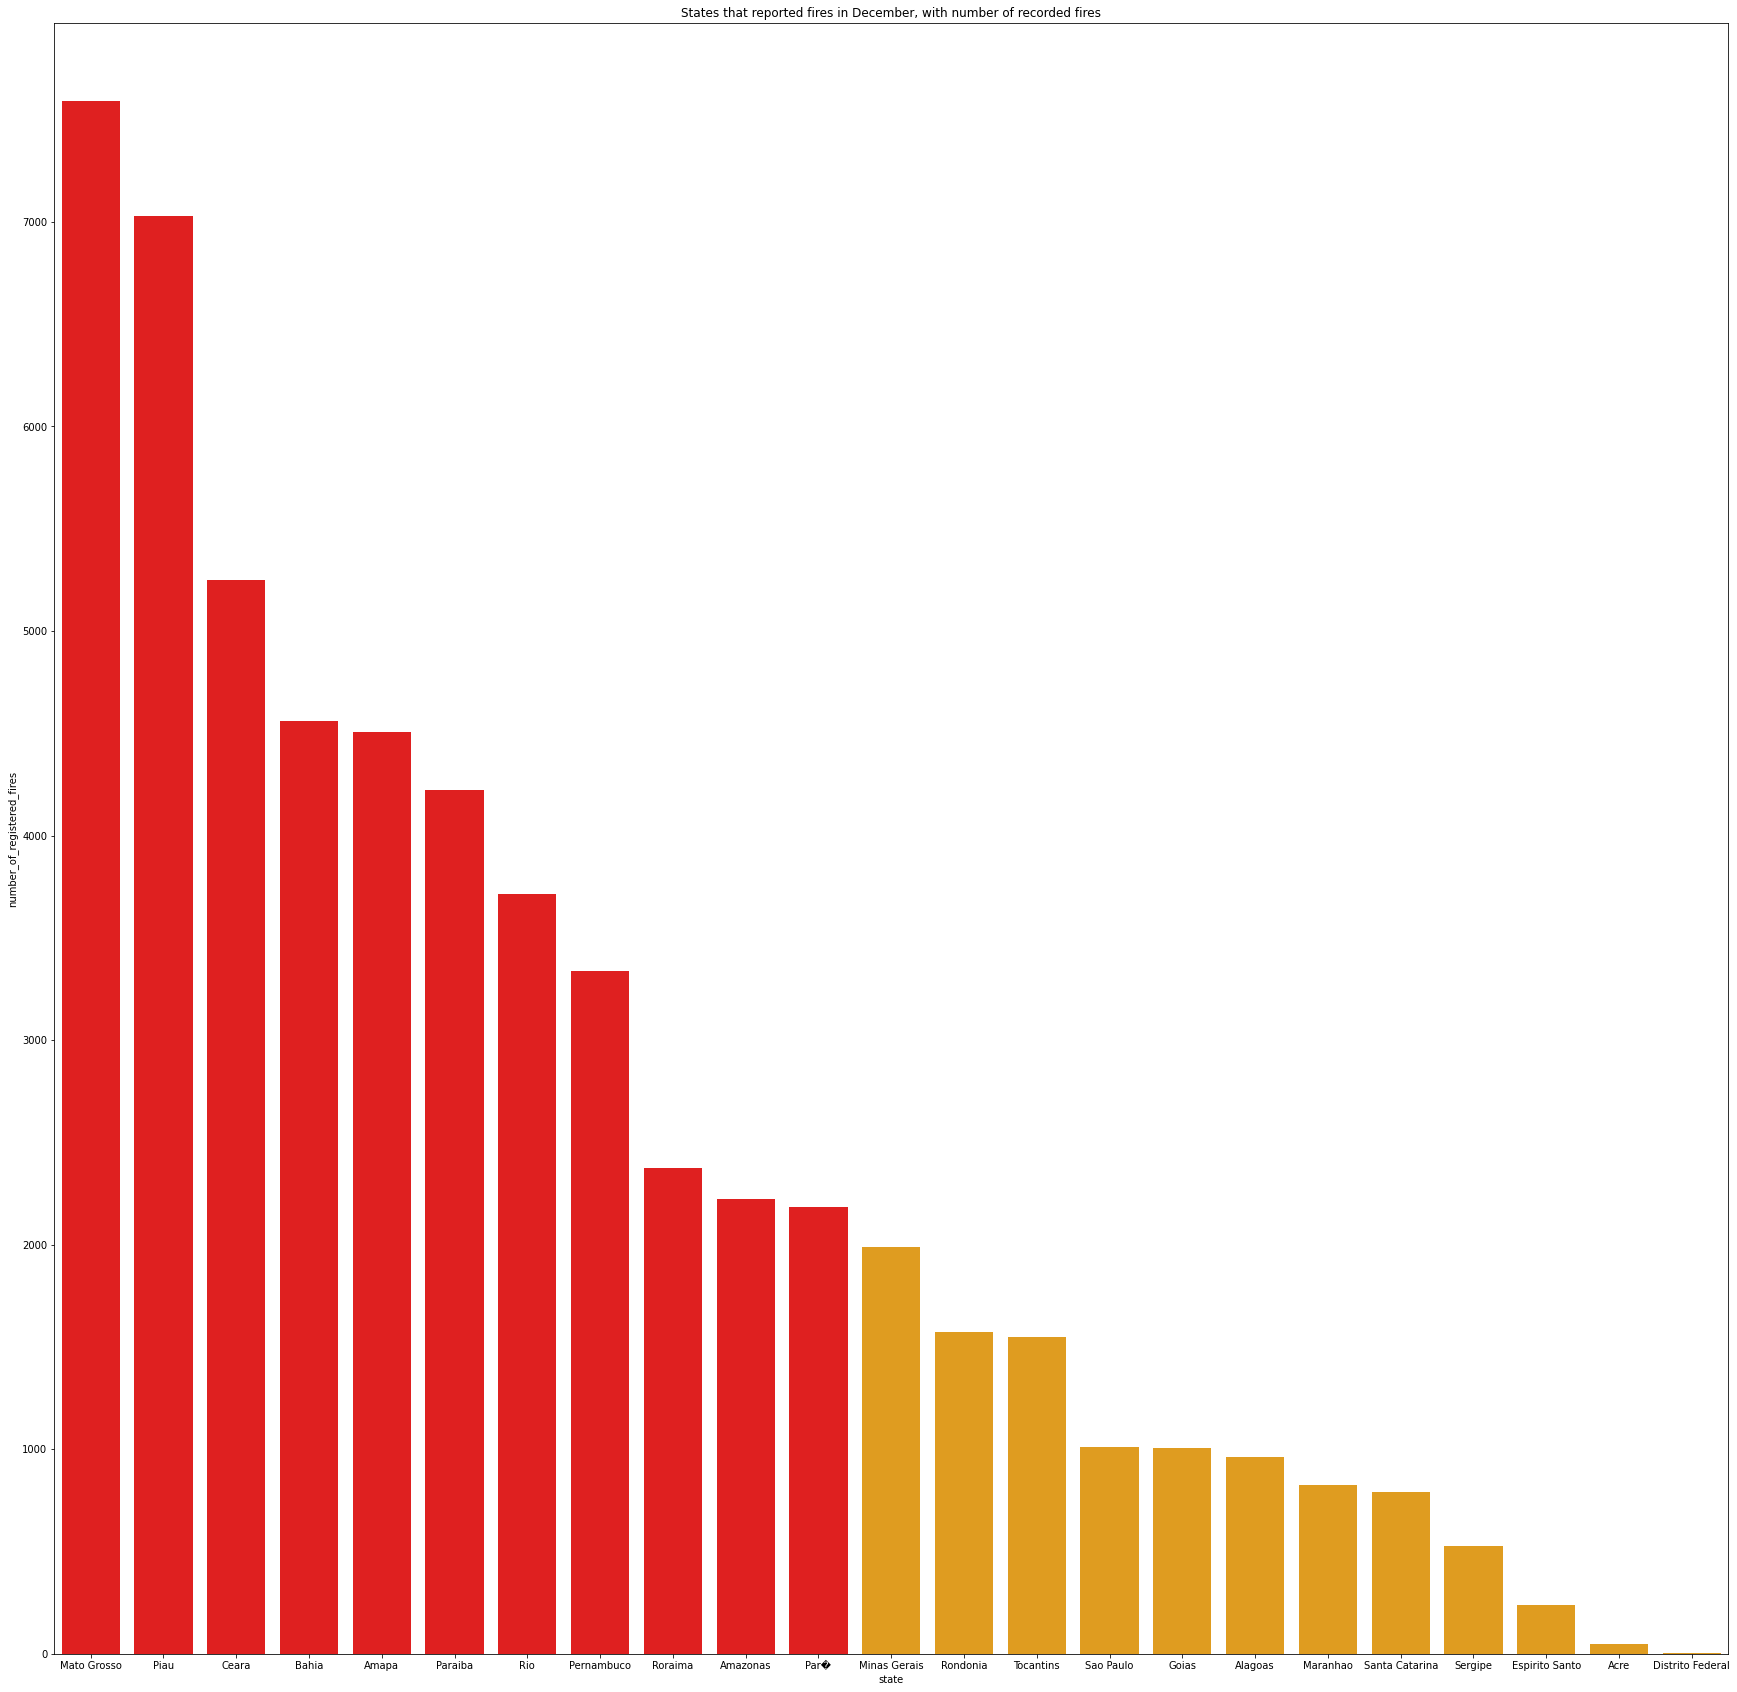

In [ ]:
#create barplot for dataframe
x = g12['state']
y = g12['number_of_registered_fires']
clrs = ['red' if (y >= 2000) else 'orange' for y in y]
plt.figure(figsize=(30,30))
sns.barplot(x = x, y = y, data = g12, palette=clrs).set(title="States that reported fires in December, with number of recorded fires")

Bars in red denote reported fires in december over 2000 and orange denotes less than 2000 fires reported for december. The Highest was Mato Grosso and least fires reported were Distrito Federal(only 5 during that month).

Additional Analysis

Total Number of Registered Fires by State between 1998-2017

In [ ]:
g1 = df.groupby('state').sum()
g2 = g1.sort_values(by='number_of_registered_fires',ascending=False).reset_index()
g2

,state,year,number_of_registered_fires
0,Mato Grosso,949576,96178
1,Paraiba,947563,52423
2,Sao Paulo,479783,51118
3,Rio,1399308,45094
4,Bahia,479783,44718
5,Piau,479783,37777
6,Goias,479783,37677
7,Minas Gerais,479783,37453
8,Tocantins,479783,33675
9,Amazonas,479783,30636


[Text(0.5, 1.0, 'Total Number of Registered Fires by State between 1998-2017')]

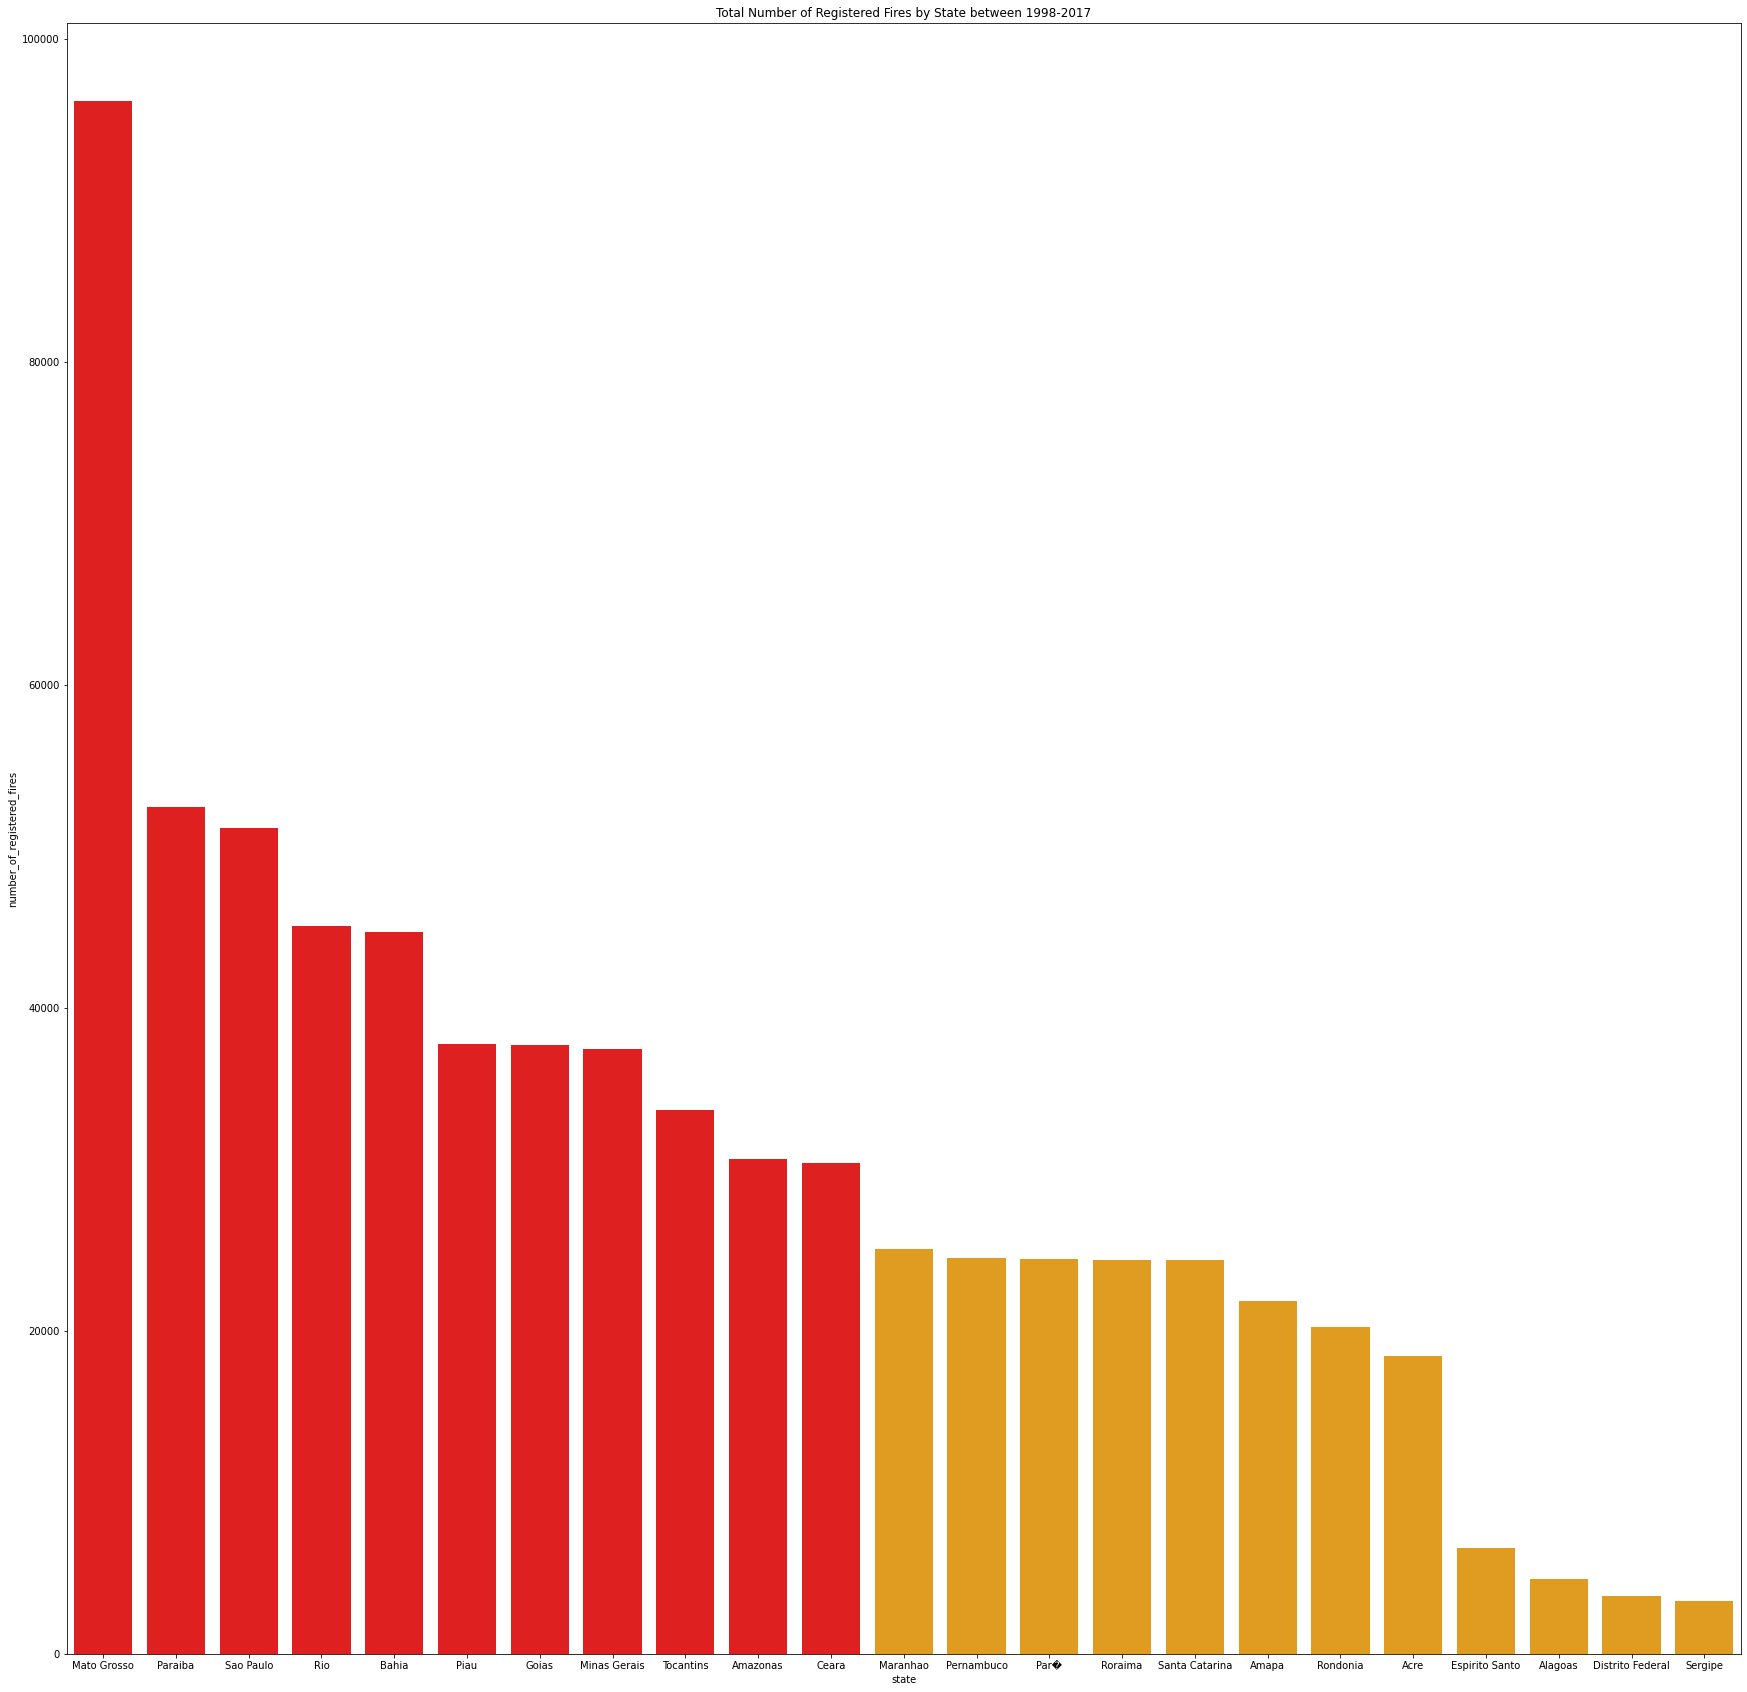

In [ ]:
#create barplot for dataframe
x = g2['state']
y = g2['number_of_registered_fires']
clrs = ['red' if (y >= 30000) else 'orange' for y in y]
plt.figure(figsize=(30,30))
sns.barplot(x = x, y = y, data = g12, palette=clrs).set(title="Total Number of Registered Fires by State between 1998-2017")

Bars with red color states have fires over 30000 and bars with orange states have under 30000.  Mato Grosso had the most fires between 98-17 and Sergipe had the least between 98-17.

KNN Algorithim Analysis

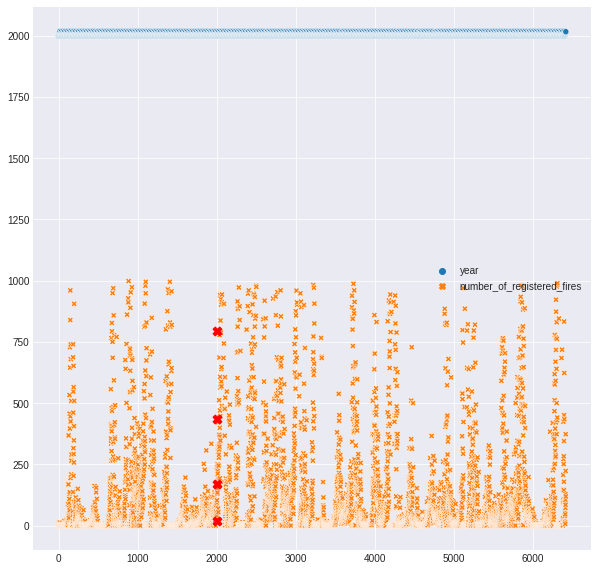

In [52]:
data = df[['year', 'number_of_registered_fires']]

kmeans = KMeans(n_clusters=4, init='random', random_state=50, max_iter=50, algorithm='full').fit(data)

#set size of plot
plt.figure(figsize=(10,10))

sns.scatterplot(data=data)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80)
plt.legend()
plt.show()

Regression/Correlation Analysis

In [60]:
grp1 = df.groupby('year').sum().reset_index()
grp1

,year,number_of_registered_fires
0,1998,19999
1,1999,26869
2,2000,27341
3,2001,29039
4,2002,37369
5,2003,42737
6,2004,38424
7,2005,34984
8,2006,33811
9,2007,33008


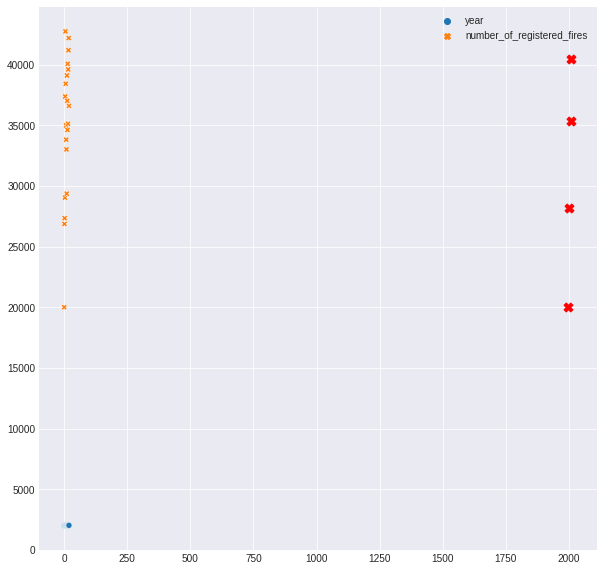

In [82]:
data = grp1[['year', 'number_of_registered_fires']]

kmeans = KMeans(n_clusters=4, init='random', random_state=50, max_iter=50, algorithm='full').fit(data)

#set size of plot
plt.figure(figsize=(10,10))

sns.scatterplot(data=data)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80)
plt.legend()
plt.show()

Summed/queried ammounts show two different data-clusters.

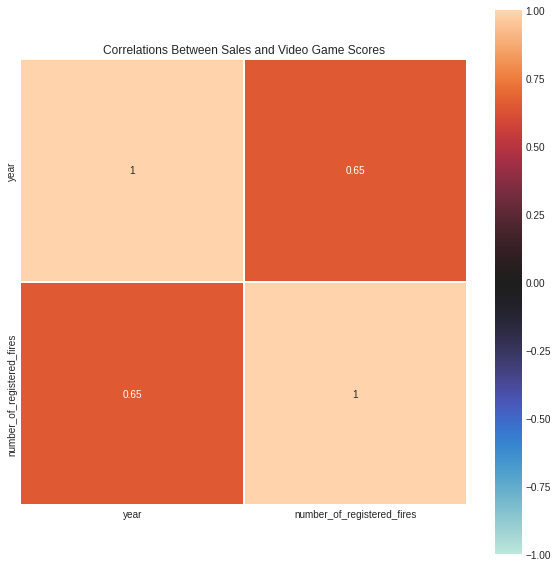

In [61]:
plt.figure(figsize=(10,10))
heat_map = sns.heatmap(grp1.corr(), vmax=1, vmin=-1, center=0,
linewidth=.5,square=True, annot = True)
plt.title('Correlations Between Sales and Video Game Scores')
plt.show()

Strong Correlation between total number of fires and years. I had to group and sum by year using pandas. running correlation data on non-summed data alone shows no correlation, but thats not true sometimes you need to query the data to find a correlations between two or more distributions/columns.

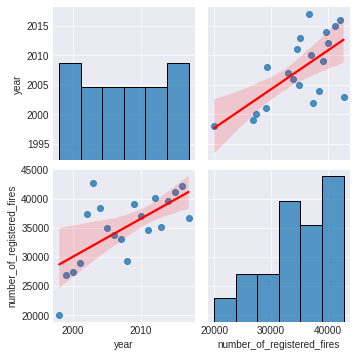

In [81]:
#seaborn pair-plot with red linear regression line
sns.pairplot(grp1, kind="reg", palette="Set2", plot_kws={'line_kws':{'color':'red'}})
plt.show()